# pyhf usage in Top FC 

Expected upper limits on signal strength using pyhf. There are three types of signals in these plots:

* Scalar like
* Vector like
* Tensor like

## Functions to draw UL plots

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

def array_to_list(CL):
    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')    

    CL = ast.literal_eval(CL)    
    Lambda = [lambd**-1 for lambd in CL]    
    return Lambda

test = '[array(0.18526298), array(0.23544205), array(0.29602205), array(0.39099281), array(0.48986435)]'
print(array_to_list(test))

def UL_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim):
#def UL_plots():

    def listMultiple(item):
        value = 1/2
        return item*value
    
    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)

    # Calculate upper and lower limits for a 95% confidence level
    scale=1/2
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]*scale
    upper_NN_low1 = [NN_low[3],NN_low[3]]*scale
    lower_NN_low2 = [NN_low[0],NN_low[0]]*scale
    upper_NN_low2 = [NN_low[4],NN_low[4]]*scale

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]*scale
    upper_NN_med1 = [NN_med[3],NN_med[3]]*scale
    lower_NN_med2 = [NN_med[0],NN_med[0]]*scale
    upper_NN_med2 = [NN_med[4],NN_med[4]]*scale

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]*scale
    upper_NN_high1 = [NN_high[3],NN_high[3]]*scale
    lower_NN_high2 = [NN_high[0],NN_high[0]]*scale
    upper_NN_high2 = [NN_high[4],NN_high[4]]*scale


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.1
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.05, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.05, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()

def UL_all_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 1
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.5, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.5, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()    

[5.397732455777188, 4.2473296507569485, 3.3781267307621174, 2.557591787941062, 2.04138145590713]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

def array_to_list(CL):
    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')    

    CL = ast.literal_eval(CL)    
    Lambda = [lambd**-1 for lambd in CL]    
    return Lambda

test = '[array(0.18526298), array(0.23544205), array(0.29602205), array(0.39099281), array(0.48986435)]'
print(array_to_list(test))

def UL_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim):
#def UL_plots():

    def listMultiple(item):
        value = 2/3
        return [x * value for x in item]
    
    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)

    # Calculate upper and lower limits for a 95% confidence level
    scale=1/2
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]; lower_NN_low1 = listMultiple(lower_NN_low1)
    upper_NN_low1 = [NN_low[3],NN_low[3]]; upper_NN_low1 = listMultiple(upper_NN_low1)
    lower_NN_low2 = [NN_low[0],NN_low[0]]; lower_NN_low2 = listMultiple(lower_NN_low2)
    upper_NN_low2 = [NN_low[4],NN_low[4]]; upper_NN_low2 = listMultiple(upper_NN_low2)

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]; lower_NN_med1 = listMultiple(lower_NN_med1)
    upper_NN_med1 = [NN_med[3],NN_med[3]]; upper_NN_med1 = listMultiple(upper_NN_med1)
    lower_NN_med2 = [NN_med[0],NN_med[0]]; lower_NN_med2 = listMultiple(lower_NN_med2)
    upper_NN_med2 = [NN_med[4],NN_med[4]]; upper_NN_med2 = listMultiple(upper_NN_med2)

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]; lower_NN_high1 = listMultiple(lower_NN_high1)
    upper_NN_high1 = [NN_high[3],NN_high[3]]; upper_NN_high1 = listMultiple(upper_NN_high1)
    lower_NN_high2 = [NN_high[0],NN_high[0]]; lower_NN_high2 = listMultiple(lower_NN_high2)
    upper_NN_high2 = [NN_high[4],NN_high[4]]; upper_NN_high2 = listMultiple(upper_NN_high2)


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.1
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.05, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.05, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()

def UL_all_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 1
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5 , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.5, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.5, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()    

[5.397732455777188, 4.2473296507569485, 3.3781267307621174, 2.557591787941062, 2.04138145590713]


In [43]:
def UL_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)

    def scalar(list1, list2):
        final_list = []
        val = 2/3
        for i in range(len(list1)):
            final_list.append(list2[i] + (list1[i] - list2[i]) * val)
        return final_list

    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]; lower_NN_low1 = scalar(lower_NN_low1, NN_low_med)
    upper_NN_low1 = [NN_low[3],NN_low[3]]; upper_NN_low1 = scalar(upper_NN_low1, NN_low_med)
    lower_NN_low2 = [NN_low[0],NN_low[0]]; lower_NN_low2 = scalar(lower_NN_low2, NN_low_med)
    upper_NN_low2 = [NN_low[4],NN_low[4]]; upper_NN_low2 = scalar(upper_NN_low2, NN_low_med)

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]; lower_NN_med1 = scalar(lower_NN_med1, NN_low_med)
    upper_NN_med1 = [NN_med[3],NN_med[3]]; upper_NN_med1 = scalar(upper_NN_med1, NN_low_med)
    lower_NN_med2 = [NN_med[0],NN_med[0]]; lower_NN_med2 = scalar(lower_NN_med2, NN_low_med)
    upper_NN_med2 = [NN_med[4],NN_med[4]]; upper_NN_med2 = scalar(upper_NN_med2, NN_low_med)

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]; lower_NN_high1 = scalar(lower_NN_high1, NN_low_med)
    upper_NN_high1 = [NN_high[3],NN_high[3]]; upper_NN_high1 = scalar(upper_NN_high1, NN_low_med)
    lower_NN_high2 = [NN_high[0],NN_high[0]]; lower_NN_high2 = scalar(lower_NN_high2, NN_low_med)
    upper_NN_high2 = [NN_high[4],NN_high[4]]; upper_NN_high2 = scalar(upper_NN_high2, NN_low_med)


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 0.1
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.05 , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.05, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.05, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()

# ttbar up

In [44]:
def array_to_list(CL):
    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')    

    CL = ast.literal_eval(CL)    
    Lambda = [lambd**-1 for lambd in CL]    
    return Lambda

test = '[array(0.18526298), array(0.23544205), array(0.29602205), array(0.39099281), array(0.48986435)]'
print(array_to_list(test))

[5.397732455777188, 4.2473296507569485, 3.3781267307621174, 2.557591787941062, 2.04138145590713]


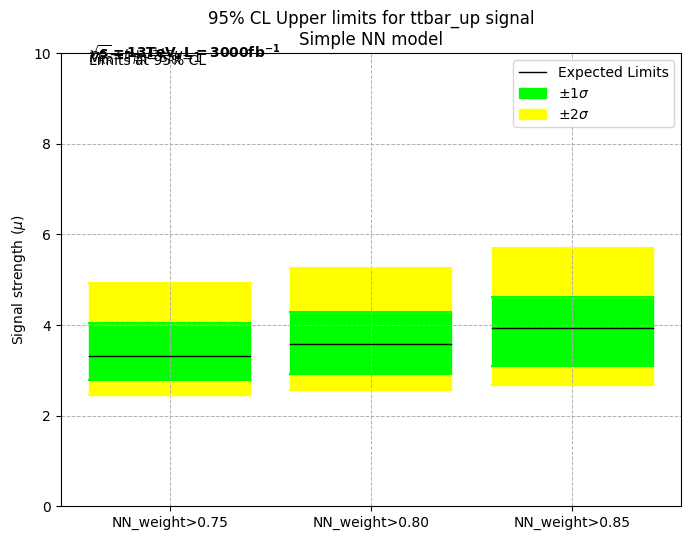

In [45]:
UL_plots('[array(0.17408539), array(0.22689247), array(0.30150235), array(0.39483887), array(0.49252054)]',
         '[array(0.16086718), array(0.20985204), array(0.27913368), array(0.36701031), array(0.46066688)]',
         '[array(0.14511485), array(0.18974092), array(0.25382425), array(0.336093), array(0.4270327)]',
         'ttbar_up', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Simple NN model', [0,10])

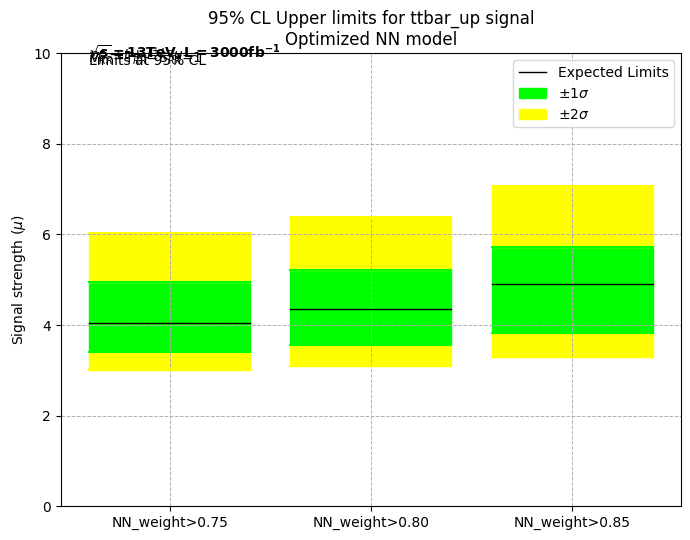

In [46]:
UL_plots('[array(0.14215047), array(0.18577429), array(0.24687428), array(0.32381149), array(0.40521795)]',
         '[array(0.13223148), array(0.17266668), array(0.22969765), array(0.30252897), array(0.3803041)]',
         '[array(0.11644182), array(0.15250869), array(0.20399099), array(0.27025121), array(0.34331855)]',
         'ttbar_up', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Optimized NN model', [0,10])

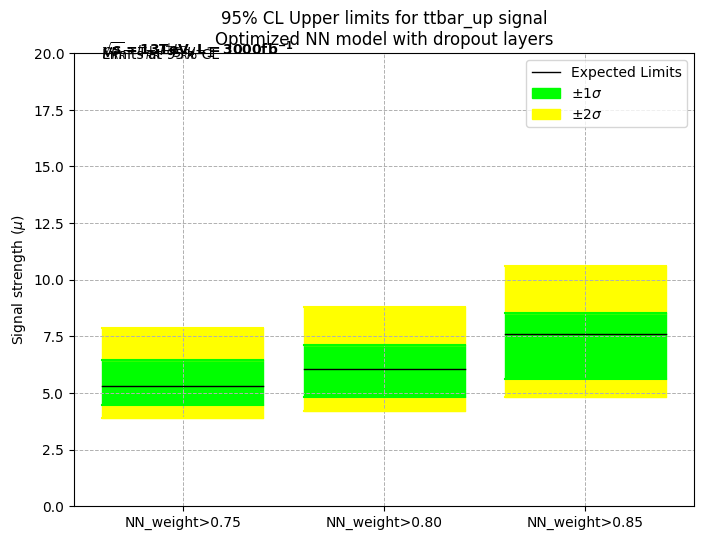

In [48]:
UL_plots('[array(0.10914404), array(0.14254065), array(0.18910282), array(0.24788306), array(0.31082832)]',
         '[array(0.09510332), array(0.12414347), array(0.16509455), array(0.2171951), array(0.27311108)]',
         '[array(0.07533464), array(0.09850829), array(0.13122339), array(0.17357771), array(0.21958492)]',
         'ttbar_up', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Optimized NN model with dropout layers', [0,20])

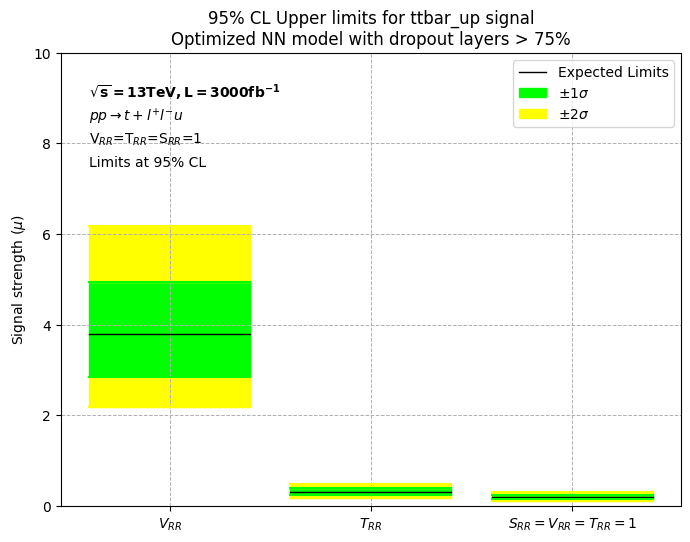

In [11]:
UL_all_plots('[array(2.19036092), array(2.85422813), array(3.78784385), array(4.95248964), array(6.17484683)]',
         '[array(0.18108938), array(0.23256318), array(0.306306), array(0.39955887), array(0.49305983)]',
         '[array(0.10914404), array(0.14254065), array(0.18910282), array(0.24788306), array(0.31082832)]',
         'ttbar_up', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 75%', [0,10])

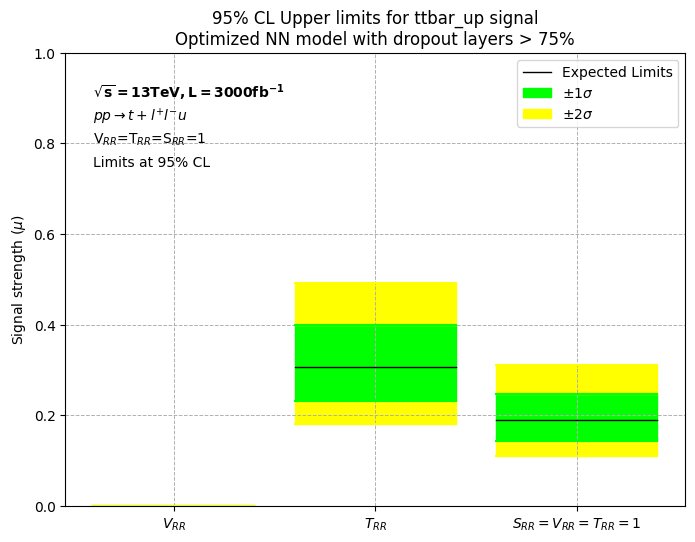

In [13]:
UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.18108938), array(0.23256318), array(0.306306), array(0.39955887), array(0.49305983)]',
         '[array(0.10914404), array(0.14254065), array(0.18910282), array(0.24788306), array(0.31082832)]',
         'ttbar_up', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 75%', [0,1])

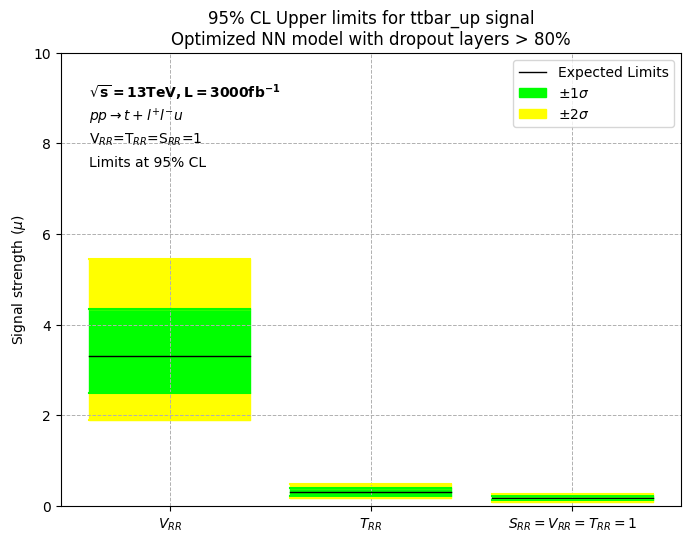

In [14]:
UL_all_plots('[array(1.90610693), array(2.49076214), array(3.31276821), array(4.34966138), array(5.4593862)]',
         '[array(0.17541931), array(0.22501041), array(0.29913343), array(0.38813917), array(0.48370442)]',
         '[array(0.09510332), array(0.12414347), array(0.16509455), array(0.2171951), array(0.27311108)]',
         'ttbar_up', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [0,10])

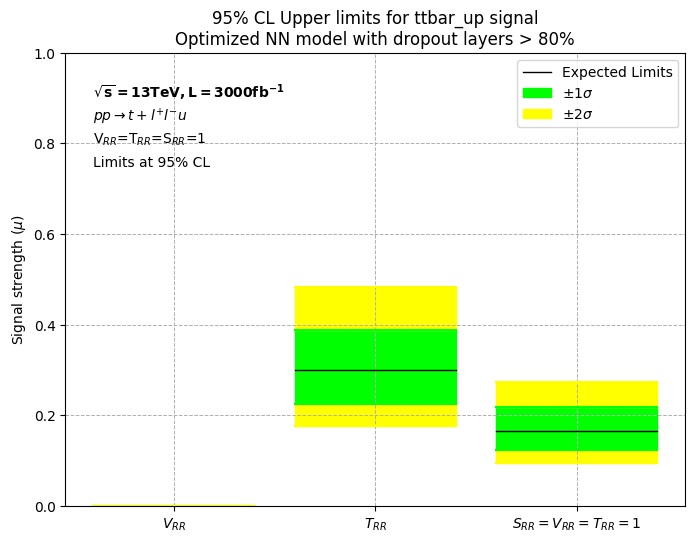

In [16]:
UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.17541931), array(0.22501041), array(0.29913343), array(0.38813917), array(0.48370442)]',
         '[array(0.09510332), array(0.12414347), array(0.16509455), array(0.2171951), array(0.27311108)]',
         'ttbar_up', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [0,1])

# ttbar charm

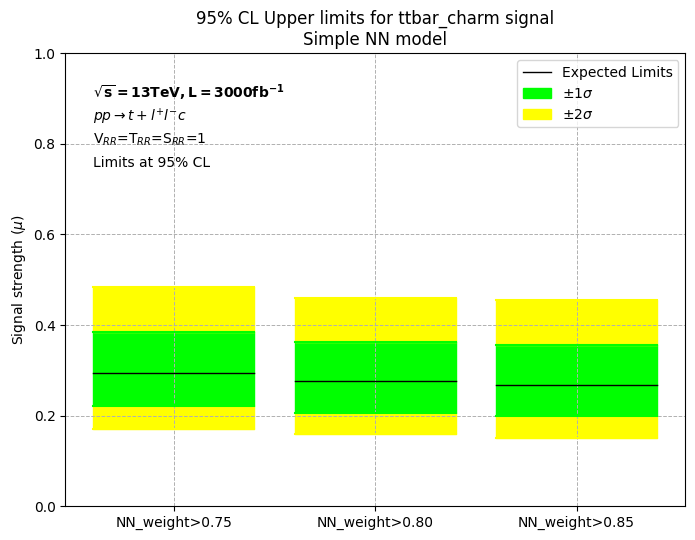

In [376]:
UL_plots('[array(0.16995817), array(0.22123871), array(0.29380828), array(0.38513289), array(0.48318188)]',
         '[array(0.15814555), array(0.20550003), array(0.27551894), array(0.36234972), array(0.45874746)]',
         '[array(0.15113915), array(0.19900695), array(0.26692745), array(0.35546054), array(0.45521384)]',
         'ttbar_charm', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Simple NN model', [0,1])

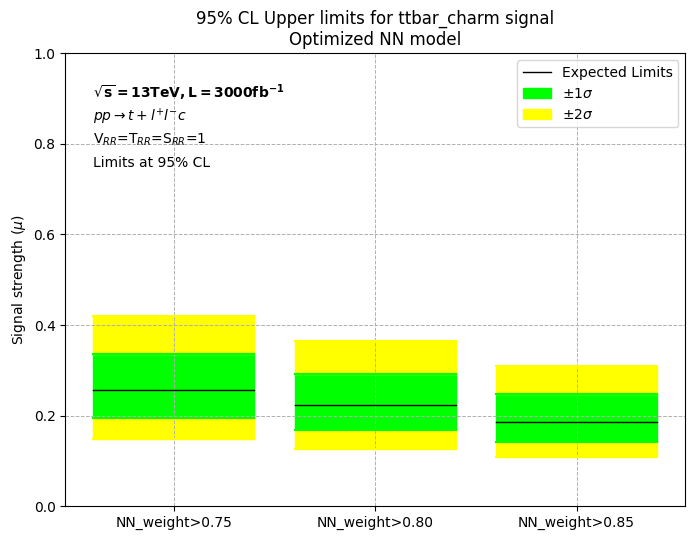

In [377]:
UL_plots('[array(0.14873523), array(0.19424455), array(0.25644373), array(0.33585532), array(0.42002072)]',
         '[array(0.12707925), array(0.16757882), array(0.22227411), array(0.29145953), array(0.36467137)]',
         '[array(0.10767591), array(0.1405507), array(0.18641008), array(0.2464848), array(0.30998985)]',
         'ttbar_charm', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Optimized NN model', [0,1])

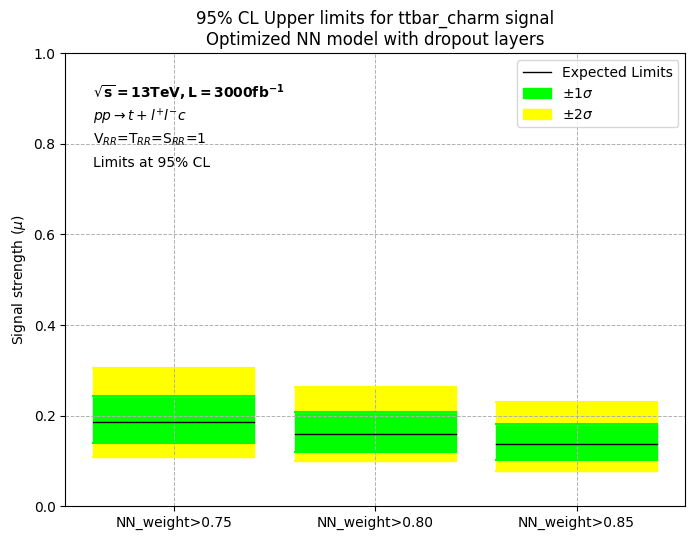

In [20]:
UL_plots('[array(0.10777805), array(0.1403877), array(0.1854143), array(0.24396336), array(0.30539504)]',
         '[array(0.1), array(0.11974006), array(0.15853882), array(0.20834614), array(0.2638776)]',
         '[array(0.07718075), array(0.10126216), array(0.13774739), array(0.18042478), array(0.23033588)]',         
         'ttbar_charm', 'NN_weight>0.75', 'NN_weight>0.80', 'NN_weight>0.85', 'Optimized NN model with dropout layers', [0,1])

# ttbar-charm all

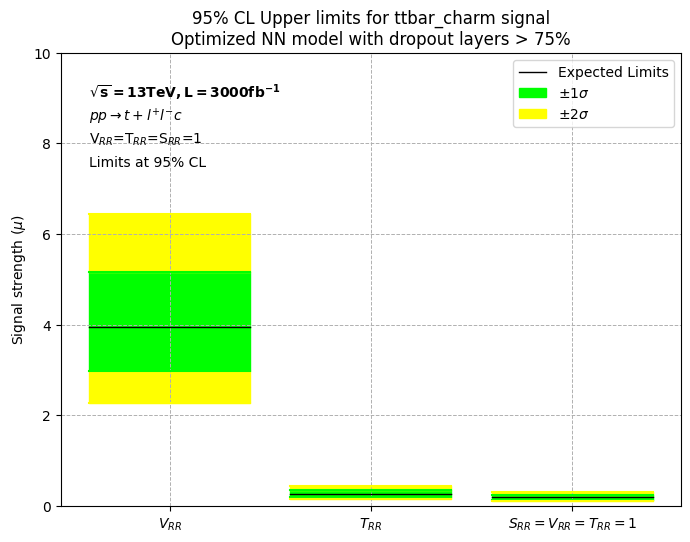

In [395]:
UL_all_plots('[array(2.2816063), array(2.97391385), array(3.94654435), array(5.16698866), array(6.44748672)]',
         '[array(0.15305498), array(0.20165954), array(0.2634241), array(0.34883998), array(0.42948169)]',
         '[array(0.10777805), array(0.1403877), array(0.1854143), array(0.24396336), array(0.30539504)]',
         'ttbar_charm', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 75%', [0,10])

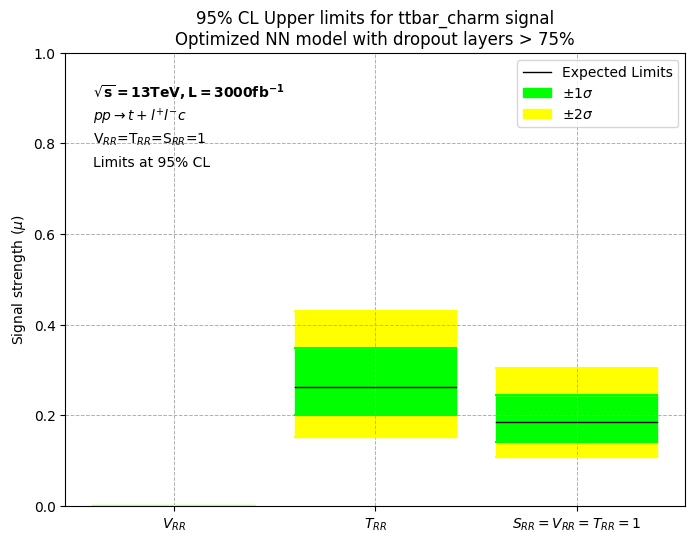

In [27]:
UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.15305498), array(0.20165954), array(0.2634241), array(0.34883998), array(0.42948169)]',
         '[array(0.10777805), array(0.1403877), array(0.1854143), array(0.24396336), array(0.30539504)]',
         'ttbar_charm', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 75%', [0,1])

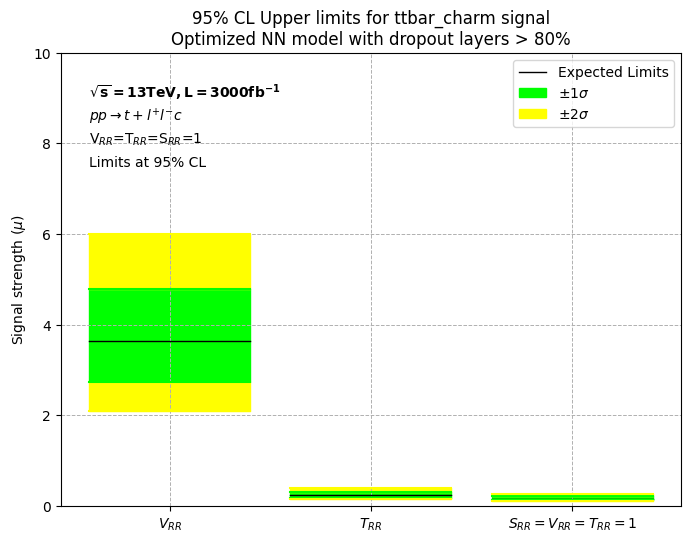

In [396]:
UL_all_plots('[array(2.09669706), array(2.73480403), array(3.64589365), array(4.78655079), array(6.00283274)]',
         '[array(0.14214937), array(0.18253698), array(0.23958449), array(0.31036259), array(0.38514362)]',
         '[array(0.1), array(0.11974006), array(0.15853882), array(0.20834614), array(0.2638776)]',
         'ttbar_charm', '$V_{RR}$', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [0,10])

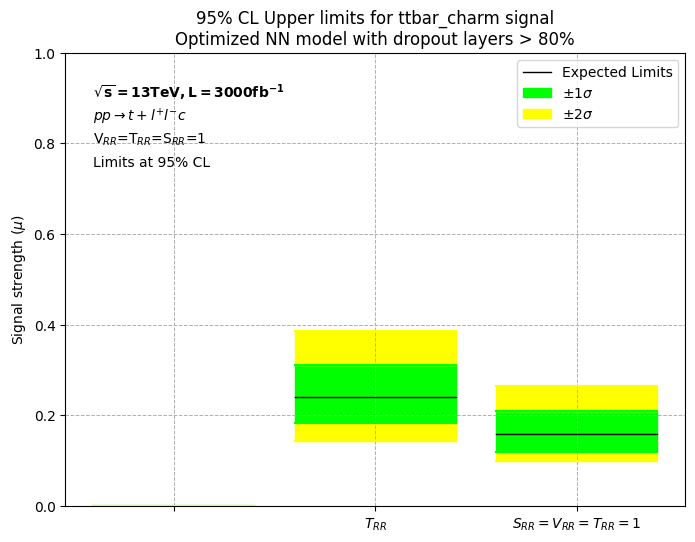

In [9]:
UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.14214937), array(0.18253698), array(0.23958449), array(0.31036259), array(0.38514362)]',
         '[array(0.1), array(0.11974006), array(0.15853882), array(0.20834614), array(0.2638776)]',
         'ttbar_charm', '', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 80%', [0,1])

# tW-charm signal

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import array
import ast

def array_to_list(CL):
    CL = CL.replace('array', '')
    CL = CL.replace('(', '')
    CL = CL.replace(')', '')

    CL = ast.literal_eval(CL)    
    return CL

test = '[array(0.18526298), array(0.23544205), array(0.29602205), array(0.39099281), array(0.48986435)]'
array_to_list(test)

def tW_UL_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim, factor):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 1*factor
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def tw_UL_all_plots(NN_low, NN_med, NN_high, x_title, weight_low, weight_med, weight_high, model, y_lim, factor):
#def UL_plots():

    # Convert strings to lists
    NN_low = array_to_list(NN_low)
    NN_med = array_to_list(NN_med)
    NN_high = array_to_list(NN_high)

    # Generate some example data (x values)
    x_values_low = np.linspace(1, 3, 2)
    x_values_med = np.linspace(3.5, 5.5, 2)
    x_values_high = np.linspace(6, 8, 2)


    # Calculate upper and lower limits for a 95% confidence level
    NN_low_med = [NN_low[2],NN_low[2]]
    lower_NN_low1 = [NN_low[1],NN_low[1]]
    upper_NN_low1 = [NN_low[3],NN_low[3]]
    lower_NN_low2 = [NN_low[0],NN_low[0]]
    upper_NN_low2 = [NN_low[4],NN_low[4]]

    NN_med_med = [NN_med[2],NN_med[2]]
    lower_NN_med1 = [NN_med[1],NN_med[1]]
    upper_NN_med1 = [NN_med[3],NN_med[3]]
    lower_NN_med2 = [NN_med[0],NN_med[0]]
    upper_NN_med2 = [NN_med[4],NN_med[4]]

    NN_high_med = [NN_high[2],NN_high[2]]
    lower_NN_high1 = [NN_high[1],NN_high[1]]
    upper_NN_high1 = [NN_high[3],NN_high[3]]
    lower_NN_high2 = [NN_high[0],NN_high[0]]
    upper_NN_high2 = [NN_high[4],NN_high[4]]    


    # Create the plot for low NN_weight
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(x_values_low, NN_low_med, label='Expected Limits', color='black', linewidth=1)
    plt.plot(x_values_low, lower_NN_low1, color='lime')
    plt.plot(x_values_low, lower_NN_low2, color='yellow')
    plt.plot(x_values_low, upper_NN_low1, color='lime')
    plt.plot(x_values_low, upper_NN_low2, color='yellow')

    plt.fill_between(x_values_low, NN_low_med, lower_NN_low1, color='lime', label='$\pm$1$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, NN_low_med, upper_NN_low1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_low, lower_NN_low1, lower_NN_low2, color='yellow', label='$\pm$2$\sigma$')  # Fill area between curves
    plt.fill_between(x_values_low, upper_NN_low1, upper_NN_low2, color='yellow')  # Fill area between curves

    # Create the plot for med NN_weight
    plt.plot(x_values_med, NN_med_med, color='black', linewidth=1)
    plt.plot(x_values_med, lower_NN_med1, color='lime')
    plt.plot(x_values_med, lower_NN_med2, color='yellow')
    plt.plot(x_values_med, upper_NN_med1, color='lime')
    plt.plot(x_values_med, upper_NN_med2, color='yellow')

    plt.fill_between(x_values_med, NN_med_med, lower_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, NN_med_med, upper_NN_med1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_med, lower_NN_med1, lower_NN_med2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_med, upper_NN_med1, upper_NN_med2, color='yellow')  # Fill area between curves

    # Create the plot for low NN_weight
    plt.plot(x_values_high, NN_high_med, color='black', linewidth=1)
    plt.plot(x_values_high, lower_NN_high1, color='lime')
    plt.plot(x_values_high, lower_NN_high2, color='yellow')
    plt.plot(x_values_high, upper_NN_high1, color='lime')
    plt.plot(x_values_high, upper_NN_high2, color='yellow')

    plt.fill_between(x_values_high, NN_high_med, lower_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, NN_high_med, upper_NN_high1, color='lime')  # Fill area between curves
    plt.fill_between(x_values_high, lower_NN_high1, lower_NN_high2, color='yellow')  # Fill area between curves
    plt.fill_between(x_values_high, upper_NN_high1, upper_NN_high2, color='yellow')  # Fill area between curves


    # Add labels and title
    plt.xticks([])
    #plt.xlabel(x_title)
    plt.ylabel('Signal strength ($\mu$)')
    plt.ylim(y_lim)
    plt.title('95% CL Upper limits for {} signal\n{}'.format(x_title, model))
    plt.legend()

    # Customize x-axis ticks and labels
    x_ticks = [2, 4.5, 7]  # Specify the tick locations
    #x_tick_labels = ['SRR', 'VRR', 'TRR']  # Specify the tick labels
    x_tick_labels = [weight_low, weight_med, weight_high]  # Specify the tick labels
    plt.xticks(x_ticks, x_tick_labels)  # Apply custom ticks and labels
    '''
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, )))
    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    '''
    y_lim_text = y_lim[1] - 1*factor
    count=0
    plt.text(1, y_lim_text, r'$\bf{\sqrt{s}=13 TeV, L=3000 fb^{-1}}$'); count +=1
    if x_title == 'ttbar_charm':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}c$') 
    if x_title == 'ttbar_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow t+l^{+}l^{-}u$')
    if x_title == 'tW_up':
        plt.text(1, y_lim_text-count*0.5*factor , r'$pp \rightarrow W+l^{+}l^{-}u$')             
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'V$_{RR}$=T$_{RR}$=S$_{RR}$=1') 
    count +=1;
    plt.text(1, y_lim_text-count*0.5*factor, 'Limits at 95% CL') 
    
    # Show the plot
    #plt.grid(True)
    #plt.minorticks_on()  # Turn on minor ticks
    plt.grid(which='both', linestyle='--', linewidth=0.7)

    plt.show()    

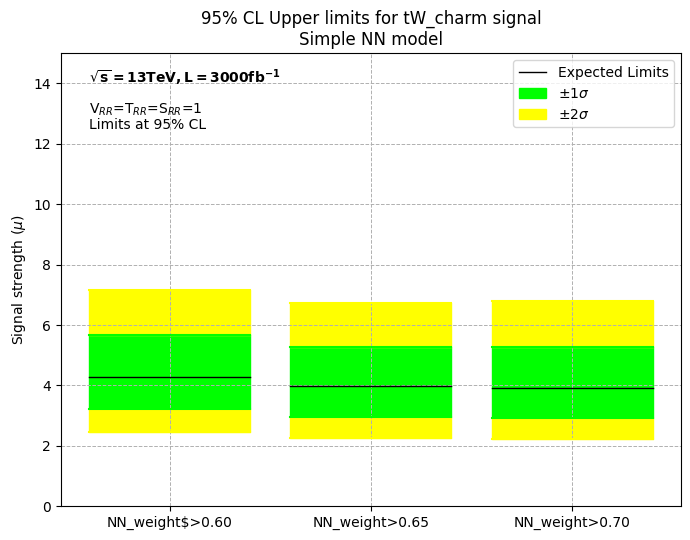

In [67]:
tW_UL_plots('[array(2.46691703), array(3.21935626), array(4.27572848), array(5.67250841), array(7.16399813)]',
         '[array(2.25758815), array(2.95286661), array(3.9625029), array(5.27246466), array(6.71822409)]',
         '[array(2.21036424), array(2.91791069), array(3.92218127), array(5.26474088), array(6.77674992)]',
         'tW_charm', 'NN_weight$>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Simple NN model', [0,15],1)

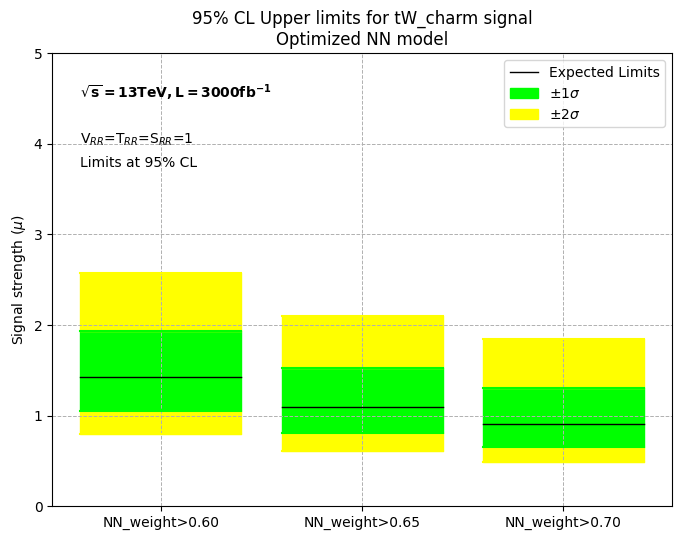

In [62]:
tW_UL_plots('[array(0.79745219), array(1.04959928), array(1.42671393), array(1.93816832), array(2.56997649)]',
         '[array(0.61002475), array(0.80263865), array(1.09746258), array(1.52917365), array(2.09644695)]',
         '[array(0.48353131), array(0.65437315), array(0.90315559), array(1.30462107), array(1.84519024)]',
         'tW_charm', 'NN_weight>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Optimized NN model', [0,5],0.5)

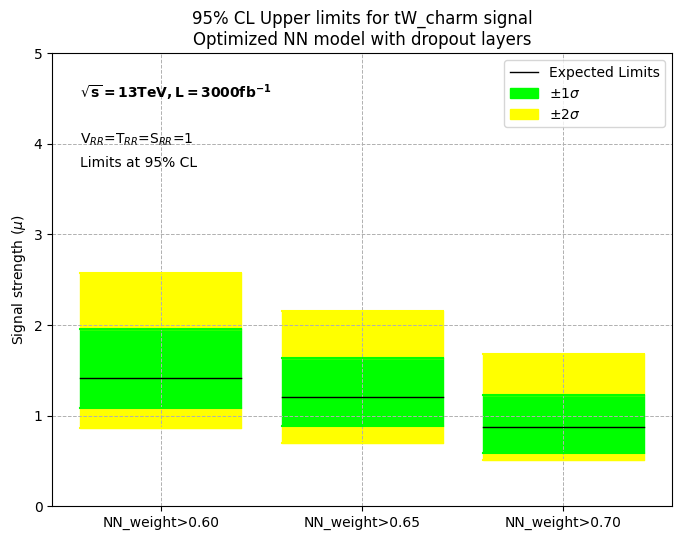

In [63]:
tW_UL_plots('[array(0.86495859), array(1.08133103), array(1.40990733), array(1.95825509), array(2.57377179)]',
         '[array(0.69992597), array(0.89001075), array(1.20383254), array(1.63052156), array(2.157451)]',
         '[array(0.50482731), array(0.59124216), array(0.87759761), array(1.22338712), array(1.67469441)]',         
         'tW_charm', 'NN_weight>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Optimized NN model with dropout layers', [0,5],0.5)

# tW-charm all

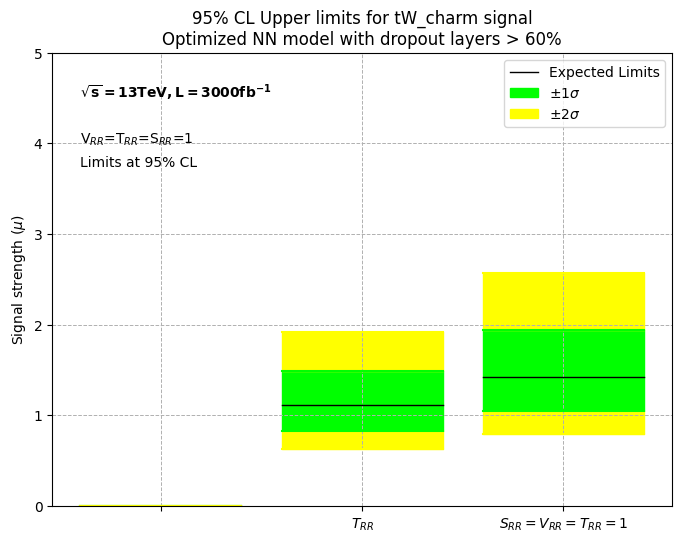

In [64]:
tW_UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.62800435), array(0.82608494), array(1.11083475), array(1.48738159), array(1.91373767)]',
         '[array(0.79745219), array(1.04959928), array(1.42671393), array(1.93816832), array(2.56997649)]',
         'tW_charm', '', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 60%', [0,5],0.5)

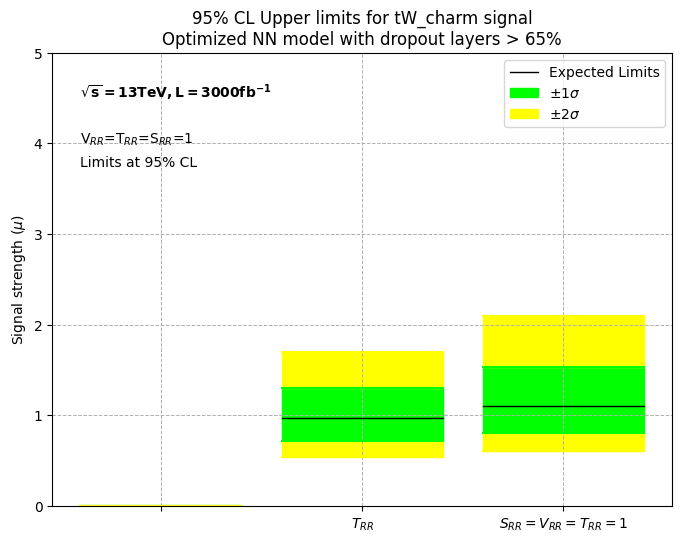

In [65]:
tW_UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.54421894), array(0.71608558), array(0.96773692), array(1.30400938), array(1.69340687)]',
         '[array(0.61002475), array(0.80263865), array(1.09746258), array(1.52917365), array(2.09644695)]',
         'tW_charm', '', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 65%', [0,5],0.5)

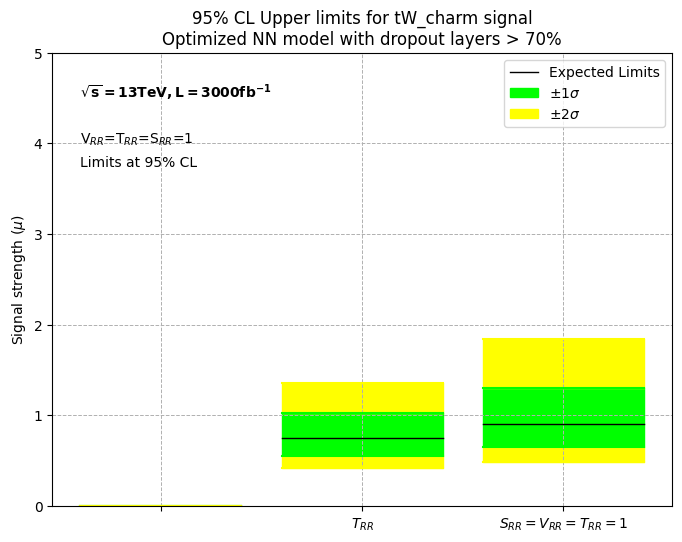

In [66]:
tW_UL_plots('[array(0), array(0), array(0), array(0), array(0)]',
         '[array(0.41514911), array(0.54969689), array(0.74811388), array(1.02557652), array(1.35789144)]',
         '[array(0.48353131), array(0.65437315), array(0.90315559), array(1.30462107), array(1.84519024)]',
         'tW_charm', '', '$T_{RR}$', '$S_{RR}=V_{RR}=T_{RR}=1$', 'Optimized NN model with dropout layers > 70%', [0,5],0.5)

# tW-up signal

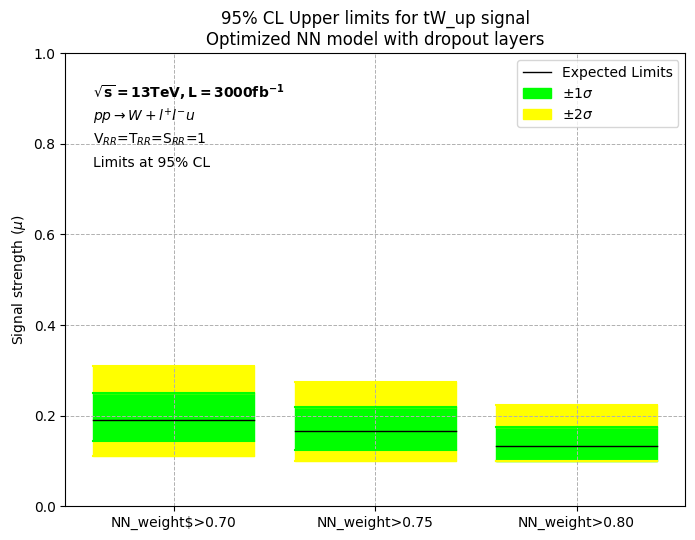

In [379]:
UL_plots('[array(0.11114868), array(0.14393388), array(0.19067895), array(0.24950321), array(0.31030417)]',
         '[array(0.1), array(0.12440445), array(0.16694065), array(0.21901415), array(0.27490902)]',
         '[array(0.1), array(0.1), array(0.13235679), array(0.17459352), array(0.22220566)]',
         'tW_up', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,1])

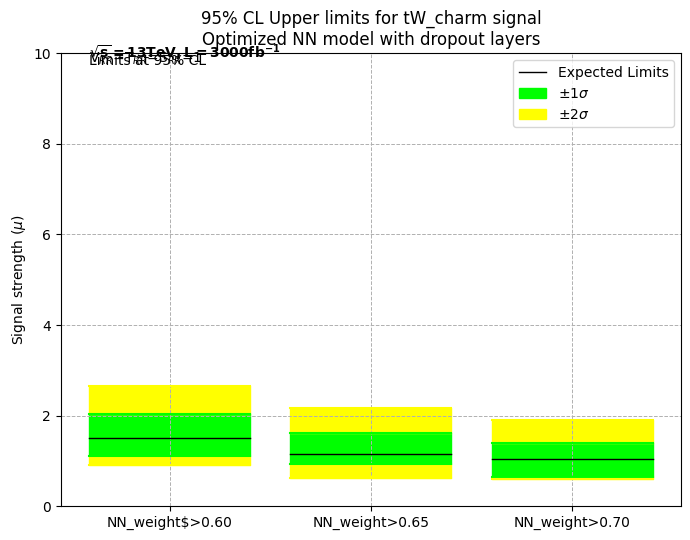

In [380]:
UL_plots('[array(0.90852024), array(1.11292963), array(1.51407632), array(2.02752408), array(2.65232309)]',
         '[array(0.63032381), array(0.92048802), array(1.14359213), array(1.61666895), array(2.16408637)]',
         '[array(0.60717916), array(0.6406899), array(1.03548178), array(1.39028829), array(1.90636366)]',
         'tW_charm', 'NN_weight$>0.60', 'NN_weight>0.65', 'NN_weight>0.70', 'Optimized NN model with dropout layers', [0,10])

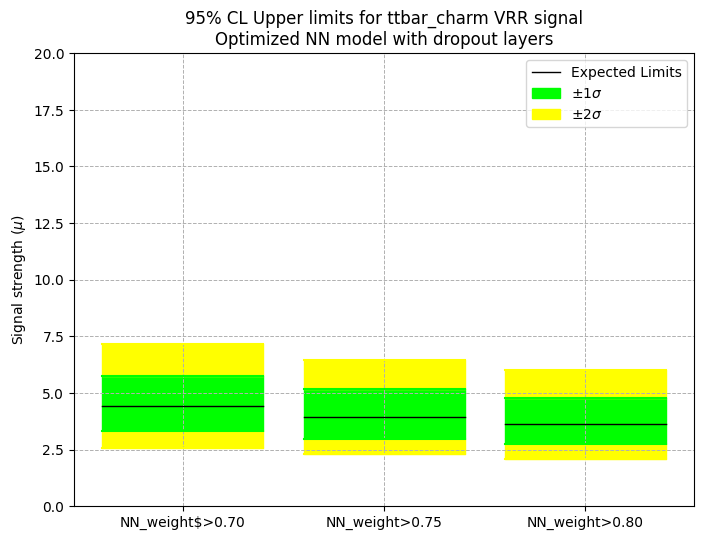

In [238]:
UL_plots('[array(2.55422787), array(3.32620989), array(4.41732855), array(5.76522565), array(7.16500134)]',
         '[array(2.2816063), array(2.97391385), array(3.94654435), array(5.16698866), array(6.44748672)]',
         '[array(2.09669706), array(2.73480403), array(3.64589365), array(4.78655079), array(6.00283274)]',
         'ttbar_charm VRR', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,20])

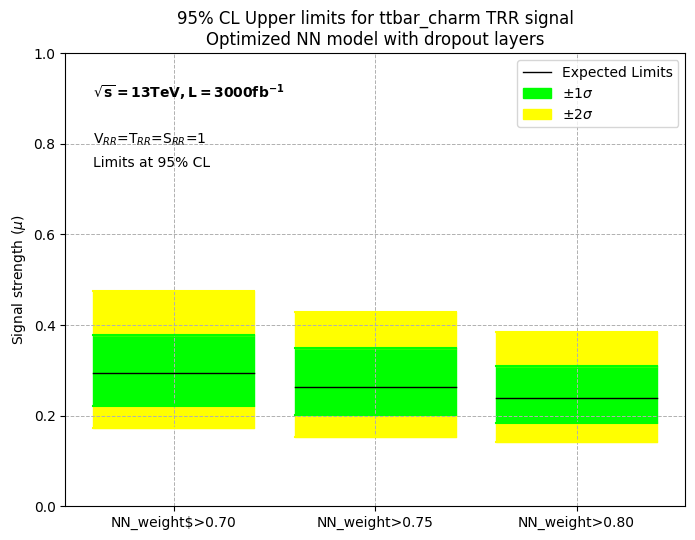

In [381]:
UL_plots('[array(0.17255878), array(0.22075815), array(0.29444444), array(0.37774075), array(0.4749654)]',
         '[array(0.15305498), array(0.20165954), array(0.2634241), array(0.34883998), array(0.42948169)]',
         '[array(0.14214937), array(0.18253698), array(0.23958449), array(0.31036259), array(0.38514362)]',
         'ttbar_charm TRR', 'NN_weight$>0.70', 'NN_weight>0.75', 'NN_weight>0.80', 'Optimized NN model with dropout layers', [0,1])